In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

import timeit

In [2]:
with open(r'C:\Users\stefa\OneDrive\Documents\Python Scripts\Problem 24 Input.txt') as f:
    lines = f.read().split('\n')
lines = lines[:-1]

## Part 1

In [3]:
move_dict = {'nw': [-.5,.5],
             'ne': [.5,.5],
             'sw': [-.5,-.5],
             'se': [.5,-.5],
             'e': [1,0],
             'w': [-1,0]
            }

In [4]:
def make_commands(line):
    comm_list = []
    skip_next = 0 

    for x in range(len(line)):
        char = line[x]
        if char == 's' or char =='n':
            command = line[x:x+2]
            skip_next = 1
            comm_list.append(command)
        elif skip_next == 1:
            skip_next = 0 
            pass
        else: 
            command = char
            comm_list.append(command)

    return comm_list

In [5]:
xy_list = []
for line in lines:
    commands = make_commands(line)
    x = 0 
    y = 0 
    for comm in commands:
        x += move_dict.get(comm)[0]
        y += move_dict.get(comm)[1]
    xy_item = [x,y]
    if xy_item in xy_list:
        xy_list.remove(xy_item)

    else:
        xy_list.append(xy_item)
len(xy_list)

388

## Part 2

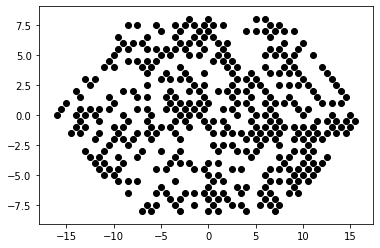

In [6]:
for dot in xy_list:
    plt.scatter(x=dot[0],y=dot[1], c='black')
plt.show()

In [12]:
count_borders([-16.5, 0.5])


2

In [11]:
move_dict.get('w')[0]

-1

In [ ]:
## Define extreme edges, count spots. 

In [8]:
def count_borders(xy):
    neighbors = 0
    for key in move_dict.keys():
        x = xy[0]
        y = xy[1]
        x = x + move_dict.get(key)[0]
        y = y + move_dict.get(key)[1]
        if [x,y] in xy_list:
            neighbors += 1
    return neighbors

In [9]:
def find_limits(xy_list):
    array_xy = np.array(xy_list)
    max_x = np.max(array_xy[:,0])+1
    max_y = np.max(array_xy[:,1])+1
    min_x = np.min(array_xy[:,0])-1
    min_y = np.min(array_xy[:,1])-1
    return [min_x,max_x,min_y,max_y]

In [10]:
def run_gen(xy_list):
    flip_to_white = []
    flip_to_black = []
    limits = find_limits(xy_list)
    for x in np.arange(limits[0],limits[1],.5):
        for y in np.arange(limits[2],limits[3],.5):
            neighbors = count_borders([x,y])
            if [x,y] in xy_list and (neighbors == 0 or neighbors > 2):
                flip_to_white.append([x,y])
            if [x,y] not in xy_list and (neighbors == 2):
                flip_to_black.append([x,y])
    xy_list = [x for x in xy_list if x not in flip_to_white] + [x for x in flip_to_black]
    
    return xy_list

In [14]:
for x in range(100):
    start = timeit.default_timer()
    
    xy_list = run_gen(xy_list)
    print(x, len(xy_list))
    
    stop = timeit.default_timer()
    print(stop-start)
    
    
len(xy_list)



0 294
0.416417899999999
1 329
0.2517887999999999
2 357
0.24182720000000302
3 387
0.24329840000000047
4 356
0.27550899999999956
5 395
0.2549974000000077
6 387
0.28332619999999054
7 461
0.3034899000000024
8 468
0.34877699999999834
9 462
0.3647398000000095
10 495
0.3791685000000058
11 511
0.4209102999999885
12 535
0.476188900000011
13 577
0.5132733000000087
14 567
0.630539899999988
15 619
0.638005800000002
16 609
0.7044262000000003
17 671
0.6870731999999862
18 677
0.8001237999999944
19 682
0.7689347000000026
20 720
0.8276074999999992
21 762
0.9374102000000022
22 821
0.9752489999999909
23 772
1.0447814999999991
24 813
1.0380448000000086
25 858
1.107656299999988
26 856
1.2574190999999928
27 896
1.2788903999999945
28 907
1.381590899999992
29 902
1.3896280000000019
30 1033
1.4570931999999885
31 1051
1.682578499999991
32 1061
1.7876182999999912
33 1011
1.826243500000004
34 1085
1.8392821999999995
35 1125
2.0162943999999925
36 1225
2.0944366999999886
37 1222
2.312247599999992
38 1259
2.41310170

4002

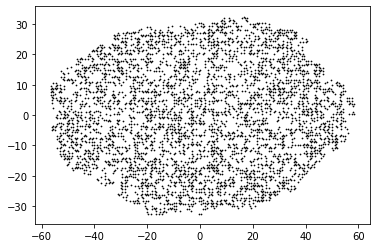

In [16]:
for dot in xy_list:
    plt.scatter(x=dot[0],y=dot[1], c='black', s=.5)
plt.show()